In [1]:
# Problem Statement:
# You work for XYZ corporations as a data scientist. 
# You just got a dataset with information about customers like age, income, spending score. 
# Your team wishes to analyze and extract some useful information from the dataset 
# and relationship between the age of the customers and their spending score. But, 
# first they need to group the data together somehow. You have been asked to analyze 
# the data and using K Means clustering group data into some groups

# You have been asked to:

# 1. Analyze Data
# 2. Extract useful columns from dataset.
# 3. Visualize data
# 4. Find out appropriate number of groups or clusters for data to be segmented in (use elbow method).
# 5. Using K Means Clustering segment the data into K groups (K was found in the previous step).
# 6. Visualize a scatter plot of the clusters.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('customers.csv')

In [4]:
# 1. Analyze Data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


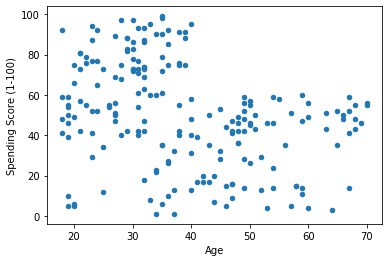

In [5]:
# Show the data
df.head()
df.isnull().sum()

import matplotlib.pyplot as plt
%matplotlib inline
df.plot.scatter(x='Age', y='Spending Score (1-100)')

In [6]:
# 2. Extract useful columns from dataset.
# x = df.iloc[:,[2,3]].values
x = df[['Age','Spending Score (1-100)']]

In [7]:
# 3. Visualize data
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [8]:
# 4. Find out appropriate number of groups or clusters for data to be segmented in (use elbow method).
from sklearn.cluster import KMeans
inertia = []
for n in range(1, 11):
    algo = KMeans(n_clusters=n)
    algo.fit(x)
    inertia.append(algo.inertia_)

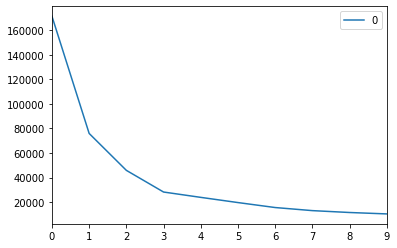

In [9]:
pd.DataFrame(inertia).plot()

In [10]:
# 5. Using K Means Clustering segment the data into K groups (K was found in the previous step).
# from sklearn.cluster import KMeans
# kmeans5 = KMeans(n_clusters=5)
# y_kmeans5 = kmeans5.fit_predict(x)
# print(y_kmeans5)

# kmeans5.cluster_centers_
algo = KMeans(n_clusters=3)
algo.fit(x)
labels = algo.labels_

In [11]:
# # 6. Visualize a scatter plot of the clusters.
# import matplotlib.pyplot as plt
# plt.scatter(x[:,0],x[:,1], c=y_kmeans5)

In [12]:
clusters = df[['Age','Spending Score (1-100)']]

In [13]:
clusters = clusters.assign(cluster=labels)

In [ ]:
clusters.plot.scatter(x='Age', y='Spending Score (1-100)', c = 'clusters', colormap='viridis')

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not clusters.